In [70]:
import pandas as  pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pylab import mpl
from matplotlib.backends.backend_pdf import PdfPages

mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号
mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 150 #分辨率

t = list(os.walk('/Users/yuanzi/学习/yz/COPD/COPD_DATA/olds_fillna'))[0][2]
t.sort()

with PdfPages('异常检测.pdf') as pdf: 
    for fname in t[1:5]:    
        df = pd.read_csv('/Users/yuanzi/学习/yz/COPD/COPD_DATA/olds_fillna/'+fname)
        df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
        df['是否正常'] = 1
        df.dtypes
        #对各项特征进行筛选
        df.loc[(df['体温']<35.8) & (df['体温']>37.4),'是否正常'] = 0#  60 岁以上 正常体温 35.8~37.4 (资料来源网络)
        df.loc[(df['呼吸率']<12) & (df['呼吸率']>20),'是否正常'] = 0#老人正常呼吸率 12~20 (资料来源网络)
        df.loc[(df['脉率']<67) & (df['脉率']>80),'是否正常'] = 0#  60 岁以上正常脉率 67~80 (资料来源网络)
        df.loc[(df['血压(低)']<60) & (df['血压(低)']>90),'是否正常'] = 0#  60 岁以上正常舒张压60~90 (资料来源网络)
        df.loc[(df['血压(高)']<90) & (df['血压(高)']>140),'是否正常'] = 0#  60 岁以上正常收缩压 90~140 (资料来源网络)
        df.loc[(df['血氧饱和度']<94),'是否正常'] = 0#  60 岁以上正常血氧饱和度>94% (资料来源网络)
        #绘制时间序列散点图
        plt.figure(figsize=(20,10))
        plt.title(fname+' 体征异常检测  1-正常/0-异常')
        plt.plot_date(x = df.date, y = df['是否正常'], fmt='.b',alpha = 0.5)
        pdf.savefig()
        plt.close()
        df.to_csv('/Users/yuanzi/学习/yz/COPD/COPD_DATA/olds_fillna_anomalyDetection/'+fname,index=False)

date     datetime64[ns]
体温              float64
呼吸率             float64
脉率              float64
血压(低)           float64
血压(高)           float64
血氧饱和度           float64
是否正常              int64
dtype: object

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '26261.csv 体征异常检测  1-正常/0-异常')

date     datetime64[ns]
体温              float64
呼吸率             float64
脉率              float64
血压(低)           float64
血压(高)           float64
血氧饱和度           float64
是否正常              int64
dtype: object

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '26313.csv 体征异常检测  1-正常/0-异常')

date     datetime64[ns]
体温              float64
呼吸率             float64
脉率              float64
血压(低)           float64
血压(高)           float64
血氧饱和度           float64
是否正常              int64
dtype: object

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '26314.csv 体征异常检测  1-正常/0-异常')

date     datetime64[ns]
体温              float64
呼吸率             float64
脉率              float64
血压(低)           float64
血压(高)           float64
血氧饱和度           float64
是否正常              int64
dtype: object

<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, '26315.csv 体征异常检测  1-正常/0-异常')

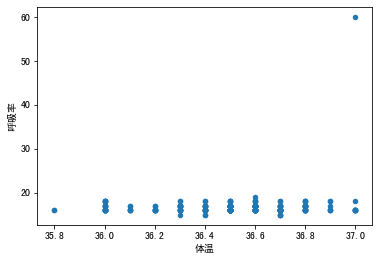

In [46]:
df.plot(x='体温',y='呼吸率',kind = 'scatter')

In [44]:
df.loc[(df['体温']>35.8) & (df['体温']<37.4),'是否正常'] = 0

In [58]:
f = '是否正常'
df.speed

AttributeError: 'DataFrame' object has no attribute 'speed'

In [40]:
d

NameError: name 'd' is not defined